## Why do these data matter?
to fill in

## Data description
__accomodates:__ The maximum number of people the rental can accomodate *(numeric)*  
__availability_60:__ Number of days the space is available within the next 60 days *(numeric)*  
__bathrooms:__ The number of bathrooms in the rental *(numeric)*  
__bed_type:__ The type of bed available *(categorical)*  
__bedrooms:__ The number of separate bedrooms in the rental *(numeric)*  
__beds:__ The number of beds in the rental *(numeric)*  
__calculated_host_listings_count_entire_homes:__ Number of listings a host has where an entire home is offered *(numeric)*  
__calculated_host_listings_count_private_rooms:__ Number of listings a host has with private rooms offered *(numeric)*  
__calendar_last_scraped:__ Date the calendar information was last pulled *(date)*  
__calendar_updated:__ Last time the host updated their calendar information *(date)*  
__cancellation_policy:__ Ranking of how strict the host is on their cancellation policy *(categorical)*  
__city:__ The city/borough the listing is located in *(categorical)*  
__cleaning_fee:__ The surcharge for cleaning the listing *(numeric)*  
__extra_people:__ The surcharge for each additional person staying in the rental *(numeric)*  
__first_review:__ The date of the first review of the listing *(date)*  
__guests_included:__ The number of guests included in the price *(numeric)*  
__host_has_profile_pic:__ Indicator of presence of profile picture on site *(Boolean)*  
__host_id:__ Host identifier *(numeric)*  
__host_identity_verified:__ Indicator of host's identity verification using offline source *(Boolean)*  
__host_is_superhost:__ Indicator of super host status (exemplary host behavior) *(Boolean)*  
__host_listings_count:__ The number of listings the host has *(numeric)*  
__host_location:__ The city the host is located in *(categorical)*  
__host_name:__ Name of host *(categorical)*  
__host_neighborhood:__ The neighborhood the host is located in *(categorical)*  
__host_response_rate:__ The rate which a host responds to contact from lessor *(numeric)*  
__host_response_time:__ Bucket of how long the host takes to respond *(categorical)*  
__host_since:__ The date of the first hosting *(date)*  
__host_verifications:__ Ways in which the host was verified *(categorical)*  
__instant_bookable:__ Indicator on ability to book instantly *(Boolean)*  
__is_location_exact:__ Indicator on if location is exact *(Boolean)*  
__last_review:__ Date the last review of the listing occured *(date)*  
__latitude:__ Latitude of the listing *(numeric)*  
__longitude:__ Longitude of the listing *(numeric)*  
__market:__ The market the listing is in (i.e., Adirondacks, NYC) *(categorical)*  
__maximum_nights:__ The maximum number of consecutive days the listing is available *(numeric)*  
__minimum_nights:__ The minimum number of days the place can be rented *(numeric)*  
__name:__ Given name of the listing *(categorical)*  
__neighborhood:__ The neighborhood the listing is located in *(categorical)*  
__number_of_reviews__: The number of reviews on a listing *(numeric)*  
__number_of_reviews_ltm:__ The number of reviews on a long term listing *(numeric)*  
__price:__ The nightly price of a listing *(numeric)*  
__property_type:__ The residence type of the listing *(numeric)*  
__require_guest_phone_verification:__ Indicator on whether phone verification of guest is requied *(Boolean)*  
__require_guest_profile_picture:__  Indicator on whether host requires guest to post profile picture *(Boolean)*  
__review_scores_accuracy:__ The average rating of all guests on the accuracy of the listing's description *(numeric)*  
__review_scores_checkin:__ The average rating of guests' review of the check in process *(numeric)*  
__review_scores_cleanliness:__ The average rating of guests' review of cleanliness *(numeric)*  
__review_scores_communication:__ The average rating of guests' review on host communication *(numeric)*  
__review_scores_location:__ The average rating of guests' review of listing location *(numeric)*  
__review_scores_rating:__  The average rating of guests' review of overall host rating *(numeric)*  
__review_scores_value:__ The average rating of guests' review of listing value *(numeric)*  
__reviews_per_month:__ The number of reviews a listing gets per month *(numeric)*  
__room_type:__ The type of space that is available for rent *(categorical)*  
__security_deposit:__ The value of the security deposit required before rent *(numeric)*  
__smart_location:__ The city of the listing - cleaned *(categorical)*    
__state:__  The state the listing is in *(categorical)*   
__street:__ Another variable for city *(categorical)*   
__zipcode:__ The zipcode the listing is in *(numeric)* 

## Cleaning the data

In [62]:
import pandas as pd
import numpy as np
import pandas_profiling as prof
from decimal import Decimal
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
 
data = pd.read_csv("/Users/ksomes/Downloads/listings.csv") 

In [116]:
#drop redundant info and fields not useful for analysis
sub=data.drop(['id','listing_url','scrape_id','last_scraped','summary','space','description','experiences_offered'
              , 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
              'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url',
              'host_picture_url', 'country_code', 'country','amenities', 'minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'availability_30', 'availability_365','availability_90','has_availability',
               'calculated_host_listings_count','calculated_host_listings_count_shared_rooms',
               'is_business_travel_ready','host_about', 'host_acceptance_rate', 'host_total_listings_count',
              'jurisdiction_names','license','monthly_price','square_feet','weekly_price', 'requires_license'], axis=1)
print(list(sub.columns))

['name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_60', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_p

In [96]:
def money_to_decimal(x):
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return float(x)
def rem_percent(x):
    x=x.replace("%","")
    return float(x)/100
def truncate(n):
    return int(n * 1000) / 1000

In [117]:
#converts objects with money values into decimal values to become continous attribute
sub.cleaning_fee = sub.cleaning_fee.astype(str)
sub.extra_people = sub.extra_people.astype(str)
sub.security_deposit = sub.security_deposit.astype(str)
sub.price = sub.price.astype(str)
sub.loc[:,'price'] = sub.loc[:,'price'].apply(money_to_decimal)
sub.loc[:,'cleaning_fee'] = sub.loc[:,'cleaning_fee'].apply(money_to_decimal)
sub.loc[:,'extra_people'] = sub.loc[:,'extra_people'].apply(money_to_decimal)
sub.loc[:,'security_deposit'] = sub.loc[:,'security_deposit'].apply(money_to_decimal)

#imputations
sub['price']=sub.price.mask(sub.price == 0,sub.price.median())
sub.cleaning_fee=sub.cleaning_fee.fillna(sub.cleaning_fee.median())
sub.first_review=sub.first_review.fillna('2019-08-01')
sub['first_review'] =  pd.to_datetime(sub['first_review'],
                              format='%Y-%m-%d')
sub.host_response_rate = sub.host_response_rate.astype(str)
sub.loc[:,'host_response_rate'] = sub.loc[:, 'host_response_rate'].apply(rem_percent)
sub.host_response_rate=sub.host_response_rate.fillna(sub.host_response_rate.median())
sub['host_since'] =  pd.to_datetime(sub['host_since'],
                              format='%Y-%m-%d')
sub.last_review=sub.last_review.fillna('2019-08-01')
sub['last_review'] =  pd.to_datetime(sub['last_review'],
                              format='%Y-%m-%d')
sub.review_scores_accuracy=sub.review_scores_accuracy.fillna(truncate(sub.review_scores_accuracy.median()))
sub.review_scores_checkin=sub.review_scores_checkin.fillna(truncate(sub.review_scores_checkin.median()))
sub.review_scores_cleanliness=sub.review_scores_cleanliness.fillna(truncate(sub.review_scores_cleanliness.median()))
sub.review_scores_communication=sub.review_scores_communication.fillna(truncate(sub.review_scores_communication.median()))
sub.review_scores_location=sub.review_scores_location.fillna(truncate(sub.review_scores_location.median()))
sub.review_scores_rating=sub.review_scores_rating.fillna(truncate(sub.review_scores_rating.median()))
sub.review_scores_value=sub.review_scores_value.fillna(truncate(sub.review_scores_value.median()))
sub.reviews_per_month=sub.reviews_per_month.fillna(sub.reviews_per_month.median())
sub.security_deposit=sub.security_deposit.fillna(sub.security_deposit.median())

In [176]:
sub.profile_report(title="AirBnb Profiling", correlation_overrides=["recclass"])
#profile.to_file(output_file=("/Users/ksomes/Downloads/airbnb_profile.html"))

### There are potential outliers with the following variables:
 - maximum nights: the hightest values for this variable seem to be placeholders, indicating that there is no specific maximum number of days for a guest's stay (ex: 999999 and 20000000) and the host put in meaningless values (an assumption we are making). 
 - minimum nights: it appears some of these values might be user error (for example, 5 instances say the minimum number of nights is 500, and another says the minimum number is 1250). 
 - reviews per month: 95% of the observations have less than 5 reviews per month. The instances where there are 20+ reviews per month are very rare, and require careful consideration when including in analysis, although there is nothing to indicate that there has been an error. For some analysis, focusing on 95% of the data and leaving out the extreme values would be beneficial.


### Skewed variables:
 - price
 - number of reviews
 - Continue this!!
 
### Transformed variables


### Duplicate data:
 - Several minimum/maximum night variables conveying the same information
 - Availability variables were highly correlated
 - Calculated host listing variables contained same information
 - Weekly and monthly price were highly correlated with price
 - Country and country code contained same info (redundant for NY listings)
 - Requires_license is exlusively true except for 1 value
 
### Missing values:
Many attributes have thousands of missing values. This is due to the nature of AirBnb's site - reviewers are not required to provide feedback on every category, and hosts do not have to provide information in every single field. Many of the fields available on the site do not apply to every single listing, meaning that often these fields are left blank and it is not a result of error. Certain fields had a high frequency of missing values (e.g. square feet had over 90% missing values), in which we determined not to consider those variables as eligible for analysis. Out of the variables worth considering, the highest percentage of missing values is less than 40%, where we chose to impute the values by using the median of the available values to reduce changes to the shape of the distribution. For categorical variables, the values were not imputed, as "NaN" can serve as it's own factor level.

A key target variable for prediction is "price" which has 10 zero values which will be considered missing and included in imputation, since price is required for listings. 

Host neighborhood was not considered for imputation, since there are many variables that contain similar information that can be used for analysis.

First review and last review were imputed with the date 08/01/2019 with the assumption that dates farther in the past provide information about host experience, which is information we did not want to provide for missing values.

## Descriptive Statistics of Key Variables 
__Price:__  
As shown in the table below, the prices are skewed right (mean is greater than the median), meaning there are more listings with a price below the average than above. 75% of the prices per night are /$175 or less, but there are high-end options up to /$10,000 a night. The prices are widely spread, as shown by the large range (99,990) and standard deviation (236).

In [69]:
#price
sub.price.describe()
sub.price.std()

count    48864.000000
mean       151.474664
std        236.576536
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

236.57653562777037

__Beds:__  
75% of the listings have 2 beds or less, with a greater concentration of listings having only one bed available. However, there are 5 listings with over 20 times as many beds as the median number of beds, indicating that this variable is highly skewed. The maximum number of beds a listing has is 40--which is much greater than the average number of 1.55. An early hypothesis is that these values with larger values are in specific markets; the market variable will likely have a relationship with the number of beds.

In [70]:
sub.beds.describe()
sub.beds.std()

count    48822.000000
mean         1.548073
std          1.112344
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: beds, dtype: float64

1.1123440223779768

__Accomodates:__  
Similar to the "beds" variable, there is a much greater concentration of listings that accomodate 1-4 people, but there are listings with high accomodations that skew the distribution. 

In [105]:
sub.accommodates.describe()
sub.accommodates.std()

count    48864.000000
mean         2.846206
std          1.882121
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         26.000000
Name: accommodates, dtype: float64

1.8821207230880654

__Review scores rating:__ 
Most people give positive overall reviews for hosts, as shown by 75% of reviews being over a 9/10. This suggests that the rating most likely doesn't provide much information about good experiences but provides more about poor hosting experiences. 

In [108]:
sub.review_scores_rating.describe()
sub.review_scores_rating.std()

count    37760.000000
mean        93.930508
std          8.630940
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

8.63093959596575

__Reviews per month:__  
Most hosts only receive around 1 review a month, which could be indicative of the typical rate that people list their property on the site. The maximum number of reviews in a month is 66, in which case they probably have many properties that they list (which is likely a less common occurrence).  

In [111]:
sub.reviews_per_month.describe()
sub.reviews_per_month.std()

count    48864.000000
mean         1.229748
std          1.530471
min          0.010000
25%          0.270000
50%          0.710000
75%          1.550000
max         66.610000
Name: reviews_per_month, dtype: float64

1.5304708320260711

__Maximum and minimum nights:__ 
As shown by the statistics for both minimum and maximum nights, there is a wide range of periods that properties can be available. Most properties are available for a minimum of 1-5 nights, and a maximum of 29-112 nights. The New York AirBnb market (from these values) appears to offer great flexibility for customers looking for extended stays.    

In [113]:
sub.minimum_nights.describe()
sub.maximum_nights.describe()

count    48864.000000
mean         7.093116
std         20.264170
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

count    4.886400e+04
mean     4.541429e+04
std      9.715671e+06
min      1.000000e+00
25%      2.900000e+01
50%      1.124000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64

In [115]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

__Room type:__  
Most listings provide the entire space for the customer, followed closely by private spaces within the property. Only 2% of the listings offered shared spaces.

| Entire home or apartment | Private room | Shared room |
| :--- | :--- | :--- |
| 51.8% | 45.8% | 2.4% |

__Property type:__ 
98% of the properties fall into 5 types. Most of the relationships that we uncover will most likely be most powerful for apartment properties, since a great majority of the listings are apartments.

| Apartment | House | Townhouse | Condominium | Loft |
| :--- | :--- | :--- | :--- | :--- |
| 79.0% | 7.9% | 3.4% | 3.1% | 2.9% |

__Cancellation policy:__  
Most hosts offer some sort of cancellation flexibility, whether its a 14 day grace period or flexible to moderate policies. Less than 1% of the hosts have policies that are considered "strict"; it is most likely that it's in the host's long term interest to show some flexibility with guests.

| Strict 14 with grace period | flexible | moderate | super strict 60 | super strict 30 | strict |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 44.9% | 31.5% | 23.3% | 0.02% | 0.01% | 0.01% |

## Relationships between continuous variables
### Investigating correlated variables

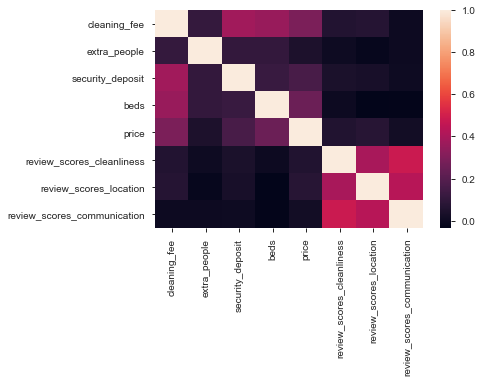

In [122]:
contDF = sub.filter(['cleaning_fee','extra_people','security_deposit', 'accomodates', 'beds', 'price',
                    'review_scores_cleanliness', 'review_scores_location', 'review_scores_communication'], axis=1)
corr=contDF.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Correlation does not appear to be a concern for the select continuous variables (price, cleaning fee, extra people, security deposit, accomodates, beds, review scores cleanliness, review scores location, and review scores communication). There appears to be somewhat high correlation with the review scores for the host, but nothing which would be of concern for analysis. 

### Pairwise relationships
__Cleaning fee and security deposit:__ There is no clear pairwise relationship between the cleaning fee and the security deposit, although it does reveal that most listings have lower costs for each, as there as a greater concentration of points closer to the origin.  
__Extra people and security deposit:__ There doesn't appear to be a relationship between the security deposit required and the cost for extra people.  
__Accomodates and beds:__  There is a strong positive linear relationship between the number of beds and the nuber of people the listing accommodates; this makes intuitive sense and confirms variable accuracy.  
__Cleaning fee and cleanliness reviews:__ It seems that listings with lower cleaning fees have lower cleanliness ratings than those with higher cleaning fees. This could suggest that hosts with higher cleaning fees have higher standards of cleanliness and put more resources into maintaining cleanliness.  


Text(0.5, 1.0, 'Cleaning fee vs. Security deposit')

Text(0.5, 0, 'Security deposit')

Text(0, 0.5, 'Cleaning fee')

Text(0.5, 1.0, 'Extra people vs. Security deposit')

Text(0.5, 0, 'Security deposit')

Text(0, 0.5, 'Extra people')

Text(0.5, 1.0, 'Accommodates vs. beds')

Text(0.5, 0, 'Accommodates')

Text(0, 0.5, 'Beds')

Text(0.5, 1.0, 'Extra people vs. Security deposit')

Text(0.5, 0, 'Security deposit')

Text(0, 0.5, 'Extra people')

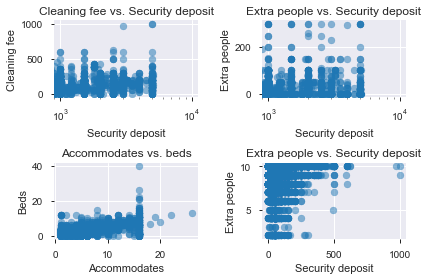

In [135]:
#cleaning_fee and extra_people and security_deposit
plt.subplot(2, 2, 1)
plt.scatter(sub.security_deposit,sub.cleaning_fee, alpha=0.5)
plt.title('Cleaning fee vs. Security deposit')
plt.xlabel('Security deposit')
plt.ylabel('Cleaning fee')
plt.xscale('log')
plt.subplot(2, 2, 2)
plt.scatter(sub.security_deposit,sub.extra_people, alpha=0.5)
plt.title('Extra people vs. Security deposit')
plt.xlabel('Security deposit')
plt.ylabel('Extra people')
plt.xscale('log')
plt.subplot(2, 2, 3)
plt.scatter(sub.accommodates,sub.beds, alpha=0.5)
plt.title('Accommodates vs. beds')
plt.xlabel('Accommodates')
plt.ylabel('Beds')
plt.subplot(2, 2, 4)
plt.scatter(sub.cleaning_fee,sub.review_scores_cleanliness, alpha=0.5)
plt.title('Cleaning fee vs. cleanliness reviews')
plt.xlabel('cleaning fee')
plt.ylabel('cleanliness score')

plt.tight_layout()
plt.show()
#accodomates and beds
#cleaning_fee and review_scores_cleanliness
#review_scores_checkin and #review_scores_communication

## Relationships between continuous and categorical variables
__Differences between neighborhoods:__ There appears to be slight differences among security deposit values between NYC neighborhoods, but not so much of a difference between how many people the listings accommodate.
__Differences between cancellation policies:__ It appears that listings with a very strict 30 day cancellation policy tend to accommodate more people and have lower host reviews on average compared to listings with different cancellation policies.  

There doesn't seem to be a difference between instant bookable listings and host review scores, nor location review scores and if the location was exact or not.  


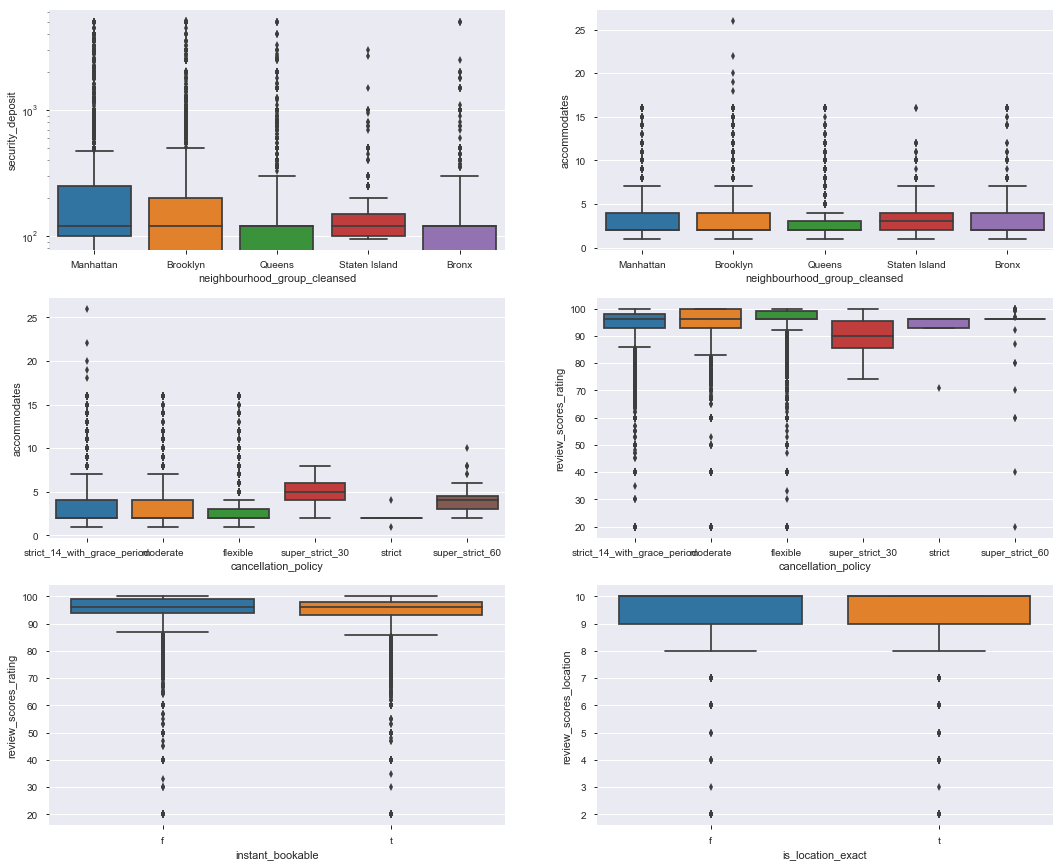

In [166]:
fig, ax= plt.subplots(3,2, figsize=(18, 15))
ax[0,0].set_yscale('log')
sns.boxplot(x='neighbourhood_group_cleansed', y='security_deposit', data=sub, ax=ax[0,0])
sns.boxplot(x='neighbourhood_group_cleansed', y='accommodates', data=sub, ax=ax[0,1])
sns.boxplot(x='cancellation_policy', y='accommodates', data=sub, ax=ax[1,0])
sns.boxplot(x='cancellation_policy', y='review_scores_rating', data=sub, ax=ax[1,1])
sns.boxplot(x='instant_bookable', y='review_scores_rating', data=sub, ax=ax[2,0])
sns.boxplot(x='is_location_exact', y='review_scores_location', data=sub, ax=ax[2,1])